<a href="https://colab.research.google.com/github/asidosaputra/rock-physics-modelling/blob/master/Kuster_Toksoz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#### Kuster-Toksoz Formulation

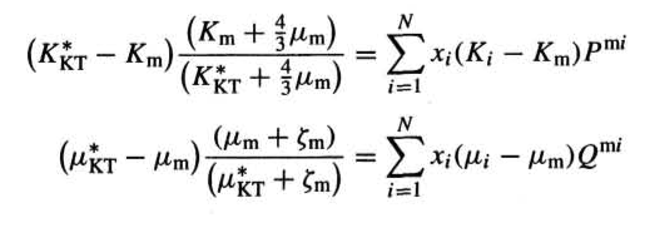

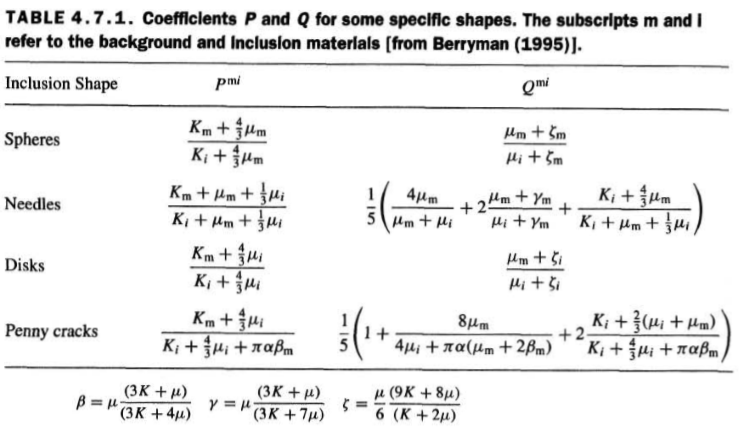

In [0]:
def kuster_toksoz(Km, um, Ki, ui, xi, si='sphere', alpha = 0.5):
    def zeta(K, u):
        Z = u/6 * ( 9*K + 8*u)/(K + 2*u)
        return Z

    def beta(K, u):
        B = u * (3*K + u)/(3*K + 4*u)
        return B

    def gamma(K, u):
        g = u*(3*K + u)/(3*K + 7*u)
        return(g)
    
    if si == 'sphere':
        Pmi = (Km + 4/3*um)/(Ki + 4/3*um)
        Qmi = (um + zeta(Km, um)) / (ui + zeta(Km, um))

    elif si == 'needle':
        Pmi = (Km + um + 1/3*ui)/(Ki + um + 1/3*ui)
        Qmi = 1/5*(4*um / (um + ui) + 2*(um + gamma(Km, um))/(ui + gamma(Km, um)) + (Ki + 4/3*um)/(Ki + um + 1/3*ui))
    
    elif si == 'disk':
        Pmi = (Km + 4/3*ui)/(Ki + 4/3*ui)
        if ui > 0:
            Qmi = (um + zeta(Ki, ui))/(ui + zeta(Ki, ui))
        else:
            Qmi = 0

    elif si == 'penny':
        Pmi = (Km + 4/3*ui)/(Ki + 4/3*ui + np.pi*alpha*beta(Km, um))
        Qmi = 1/5*(1 + 8*um / (4*ui + np.pi*alpha*(um + 2*beta(Km, um))) + 2*(Ki + 2/3*(ui + um)) /(Ki + 4/3*ui + np.pi*alpha*beta(Km, um)))
        
    Kkt = (((Km + 4/3*um)*Km + 4/3*xi*(Ki - Km)*Pmi*um) / (Km + 4/3*um - xi*(Ki - Km)*Pmi))
    ukt = ((xi*(ui - um)*Qmi*zeta(Km, um) + (um + zeta(Km, um))*um) /(um + zeta(Km, um) - xi*(ui - um)*Qmi))

    return Kkt, ukt

In [0]:
Km = 37
um = 44
Ki  = 2.25
ui = 0
xi = np.arange(0, 0.4, 0.01)

Kkt_sp, ukt_sp = kuster_toksoz(Km, um, Ki, ui, xi, si='sphere', alpha = 0.1)
Kkt_nd, ukt_nd = kuster_toksoz(Km, um, Ki, ui, xi, si='needle', alpha = 0.1)
Kkt_ds, ukt_ds = kuster_toksoz(Km, um, Ki, ui, xi, si='disk', alpha = 0.1)
Kkt_pn, ukt_pn = kuster_toksoz(Km, um, Ki, ui, xi, si='penny', alpha = 0.1)

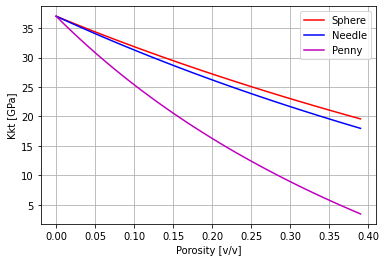

In [0]:
plt.plot(xi, Kkt_sp, 'r', label='Sphere')
plt.plot(xi, Kkt_nd, 'b', label='Needle')
# plt.plot(xi, Kkt_ds, 'k', label='Disk')
plt.plot(xi, Kkt_pn, 'm', label='Penny')

plt.ylabel('Kkt [GPa]')
plt.xlabel('Porosity [v/v]')
plt.grid()
plt.legend()
plt.show()

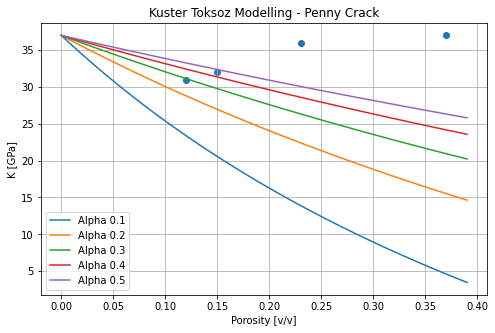

In [0]:
alpha = np.arange(0.1, 0.6, 0.1)
plt.figure(figsize=(8, 5))
for a in alpha:
    Kkt_pn, ukt_pn = kuster_toksoz(Km, um, Ki, ui, xi, si='penny', alpha = a)
    lb = 'Alpha ' + str(np.round(a, 1))
    plt.plot(xi, Kkt_pn, label=lb)

K = [31, 32, 36, 37]
phi = [0.12, 0.15, 0.23, 0.37]

plt.title('Kuster Toksoz Modelling - Penny Crack')
plt.scatter(phi, K)
plt.ylabel('K [GPa]')
plt.xlabel('Porosity [v/v]')
plt.grid()
plt.legend()
plt.show()